## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.regularizers import l1, l2, l1_l2

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[128,64,32],regularizer="l1",reg_ratio=1e-4):
    """
    Build your own model
    """
    model=Sequential()
    if regularizer =="l1":
        print("l1 regularization for input layer")
        model.add(Dense(units=input_shape[1],input_dim=input_shape[1],kernel_initializer='normal',kernel_regularizer=l1(reg_ratio),activation='relu',name='input'))
        for i, n_unit in enumerate(num_neurons):
            print(f"l1 regularization for hidden layer {i+1}")
            model.add(Dense(units=n_unit, kernel_initializer='normal',kernel_regularizer=l1(reg_ratio),activation='relu',name='hidden'+str(i+1)))
    
    elif regularizer =="l2":
        print("l2 regularization for input layer")
        model.add(Dense(units=input_shape[1],input_dim=input_shape[1],kernel_initializer='normal',kernel_regularizer=l2(reg_ratio),activation='relu',name='input'))
        for i, n_unit in enumerate(num_neurons):
            print(f"l2 regularization for hidden layer {i+1}")
            model.add(Dense(units=n_unit, kernel_initializer='normal',kernel_regularizer=l2(reg_ratio),activation='relu',name='hidden'+str(i+1)))
    
    elif regularizer =="l1_l2":
        print("l1_l2 regularization for input layer")
        model.add(Dense(units=input_shape[1],input_dim=input_shape[1],kernel_initializer='normal',kernel_regularizer=l1_l2(reg_ratio),activation='relu',name='input'))
        for i, n_unit in enumerate(num_neurons):
            print(f"l1_l2 regularization for hidden layer {i+1}")
            model.add(Dense(units=n_unit, kernel_initializer='normal',kernel_regularizer=l1_l2(reg_ratio),activation='relu',name='hidden'+str(i+1)))
    
    model.add(Dense(units=output_units, kernel_initializer='normal', activation='softmax', name='output'))
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE=1e-3
EPOCHS=30
BATCH_SIZE=256
MOMENTUM=0.9
REGULARIZER=["l1","l2","l1_l2"]
REG_RATIO=[1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""
Set your training loop
"""
for reg in REGULARIZER:
    for reg_ratio in REG_RATIO:
        keras.backend.clear_session()
        
        print(f"Current regularizer: {reg}, reg_ratio: {reg_ratio}")
        model = build_mlp(input_shape=x_train.shape, regularizer=reg, reg_ratio = reg_ratio)
        optimizer = SGD(lr=LEARNING_RATE,nesterov=True, momentum=MOMENTUM)
        
        model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
        
        model.fit(x_train,y_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test,y_test),
                  shuffle=True)
        
        #collect results
        train_loss=model.history.history['loss']
        valid_loss=model.history.history['val_loss']
        train_acc =model.history.history['acc']
        valid_acc =model.history.history['val_acc']
        
        # create result dictionary
        exp_name_tag = 'exp_%s'%str(reg)+str('_')+str(reg_ratio)
        
        results[exp_name_tag]={'train_loss':train_loss,
                               'valid_loss':valid_loss,
                               'train_acc':train_acc,
                               'valid_acc':valid_acc}

Current regularizer: l1, reg_ratio: 0.01
l1 regularization for input layer
Instructions for updating:
Colocations handled automatically by placer.
l1 regularization for hidden layer 1
l1 regularization for hidden layer 2
l1 regularization for hidden layer 3
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 45s 902us/step - loss: 3133.1393 - acc: 0.1145 - val_loss: 2352.2175 - val_acc: 0.1090
Epoch 2/30
50000/50000 [==============================] - 44s 870us/step - loss: 1764.9341 - acc: 0.1360 - val_loss: 1253.6042 - val_acc: 0.1738
Epoch 3/30
50000/50000 [==============================] - 44s 875us/step - loss: 898.7642 - acc: 0.1210 - val_loss: 601.6594 - val_acc: 0.1055
Epoch 4/30
50000/50000 [==============================] - 44s 873us/step - loss: 411.5335 - acc: 0.0999 - val_loss: 258.8329 - val_acc: 0.1000
Epoch 5/30
50000/50000 [==============================] - 44s 873us/

50000/50000 [==============================] - 43s 863us/step - loss: 37.0484 - acc: 0.4232 - val_loss: 36.9643 - val_acc: 0.4198
Epoch 22/30
50000/50000 [==============================] - 43s 852us/step - loss: 36.8548 - acc: 0.4284 - val_loss: 36.7801 - val_acc: 0.4206
Epoch 23/30
50000/50000 [==============================] - 47s 933us/step - loss: 36.6617 - acc: 0.4328 - val_loss: 36.5832 - val_acc: 0.4256
Epoch 24/30
50000/50000 [==============================] - 45s 904us/step - loss: 36.4670 - acc: 0.4393 - val_loss: 36.4573 - val_acc: 0.4180
Epoch 25/30
50000/50000 [==============================] - 45s 892us/step - loss: 36.2772 - acc: 0.4423 - val_loss: 36.2783 - val_acc: 0.4062
Epoch 26/30
50000/50000 [==============================] - 45s 910us/step - loss: 36.0868 - acc: 0.4481 - val_loss: 36.0572 - val_acc: 0.4307
Epoch 27/30
50000/50000 [==============================] - 43s 866us/step - loss: 35.8987 - acc: 0.4527 - val_loss: 35.8780 - val_acc: 0.4348
Epoch 28/30
50000/

50000/50000 [==============================] - 43s 860us/step - loss: 1.6673 - acc: 0.3961 - val_loss: 1.6616 - val_acc: 0.3925
Epoch 17/30
50000/50000 [==============================] - 44s 885us/step - loss: 1.6494 - acc: 0.4006 - val_loss: 1.6498 - val_acc: 0.3983
Epoch 18/30
50000/50000 [==============================] - 43s 853us/step - loss: 1.6313 - acc: 0.4084 - val_loss: 1.6567 - val_acc: 0.3981
Epoch 19/30
50000/50000 [==============================] - 43s 851us/step - loss: 1.6134 - acc: 0.4132 - val_loss: 1.6212 - val_acc: 0.4102
Epoch 20/30
50000/50000 [==============================] - 43s 860us/step - loss: 1.5971 - acc: 0.4204 - val_loss: 1.6112 - val_acc: 0.4174
Epoch 21/30
50000/50000 [==============================] - 44s 881us/step - loss: 1.5801 - acc: 0.4270 - val_loss: 1.5987 - val_acc: 0.4216
Epoch 22/30
50000/50000 [==============================] - 43s 860us/step - loss: 1.5654 - acc: 0.4310 - val_loss: 1.5847 - val_acc: 0.4277
Epoch 23/30
50000/50000 [=======

50000/50000 [==============================] - 41s 822us/step - loss: 4.2300 - acc: 0.3510 - val_loss: 4.2125 - val_acc: 0.3515
Epoch 11/30
50000/50000 [==============================] - 41s 820us/step - loss: 4.2033 - acc: 0.3584 - val_loss: 4.1906 - val_acc: 0.3586
Epoch 12/30
50000/50000 [==============================] - 41s 821us/step - loss: 4.1765 - acc: 0.3695 - val_loss: 4.1585 - val_acc: 0.3758
Epoch 13/30
50000/50000 [==============================] - 41s 816us/step - loss: 4.1490 - acc: 0.3806 - val_loss: 4.1350 - val_acc: 0.3796
Epoch 14/30
50000/50000 [==============================] - 41s 817us/step - loss: 4.1240 - acc: 0.3905 - val_loss: 4.1164 - val_acc: 0.3896
Epoch 15/30
50000/50000 [==============================] - 41s 817us/step - loss: 4.1008 - acc: 0.3969 - val_loss: 4.1007 - val_acc: 0.3955
Epoch 16/30
50000/50000 [==============================] - 41s 816us/step - loss: 4.0788 - acc: 0.4057 - val_loss: 4.0709 - val_acc: 0.4065
Epoch 17/30
50000/50000 [=======

50000/50000 [==============================] - 41s 818us/step - loss: 1.9764 - acc: 0.2772 - val_loss: 1.9466 - val_acc: 0.2884
Epoch 6/30
50000/50000 [==============================] - 41s 821us/step - loss: 1.9235 - acc: 0.2978 - val_loss: 1.8998 - val_acc: 0.3138
Epoch 7/30
50000/50000 [==============================] - 41s 819us/step - loss: 1.8801 - acc: 0.3190 - val_loss: 1.8627 - val_acc: 0.3294
Epoch 8/30
50000/50000 [==============================] - 41s 819us/step - loss: 1.8417 - acc: 0.3340 - val_loss: 1.8263 - val_acc: 0.3392
Epoch 9/30
50000/50000 [==============================] - 41s 827us/step - loss: 1.8099 - acc: 0.3461 - val_loss: 1.7901 - val_acc: 0.3560
Epoch 10/30
50000/50000 [==============================] - 41s 820us/step - loss: 1.7817 - acc: 0.3557 - val_loss: 1.7644 - val_acc: 0.3654
Epoch 11/30
50000/50000 [==============================] - 41s 819us/step - loss: 1.7565 - acc: 0.3651 - val_loss: 1.7389 - val_acc: 0.3733
Epoch 12/30
50000/50000 [===========

l1_l2 regularization for hidden layer 3
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 44s 881us/step - loss: 277.6323 - acc: 0.1286 - val_loss: 266.8104 - val_acc: 0.1414
Epoch 2/30
50000/50000 [==============================] - 43s 859us/step - loss: 256.6515 - acc: 0.1633 - val_loss: 246.5684 - val_acc: 0.1716
Epoch 3/30
50000/50000 [==============================] - 43s 853us/step - loss: 237.1508 - acc: 0.1922 - val_loss: 227.8341 - val_acc: 0.1948
Epoch 4/30
50000/50000 [==============================] - 43s 853us/step - loss: 219.1562 - acc: 0.2119 - val_loss: 210.5653 - val_acc: 0.2226
Epoch 5/30
50000/50000 [==============================] - 43s 851us/step - loss: 202.5496 - acc: 0.2366 - val_loss: 194.6140 - val_acc: 0.2435
Epoch 6/30
50000/50000 [==============================] - 43s 860us/step - loss: 187.2017 - acc: 0.2519 - val_loss: 179.8664 - val_acc: 0.2551
Epoch 7/30
50000/50000 [============================

50000/50000 [==============================] - 43s 853us/step - loss: 35.1819 - acc: 0.3872 - val_loss: 33.8866 - val_acc: 0.3800
Epoch 27/30
50000/50000 [==============================] - 43s 850us/step - loss: 32.6594 - acc: 0.3892 - val_loss: 31.4563 - val_acc: 0.3924
Epoch 28/30
50000/50000 [==============================] - 43s 854us/step - loss: 30.3270 - acc: 0.3922 - val_loss: 29.2251 - val_acc: 0.3899
Epoch 29/30
50000/50000 [==============================] - 43s 857us/step - loss: 28.1719 - acc: 0.3956 - val_loss: 27.1450 - val_acc: 0.3933
Epoch 30/30
50000/50000 [==============================] - 43s 857us/step - loss: 26.1782 - acc: 0.3988 - val_loss: 25.2463 - val_acc: 0.3900
Current regularizer: l1_l2, reg_ratio: 1e-12
l1_l2 regularization for input layer
l1_l2 regularization for hidden layer 1
l1_l2 regularization for hidden layer 2
l1_l2 regularization for hidden layer 3
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==========================

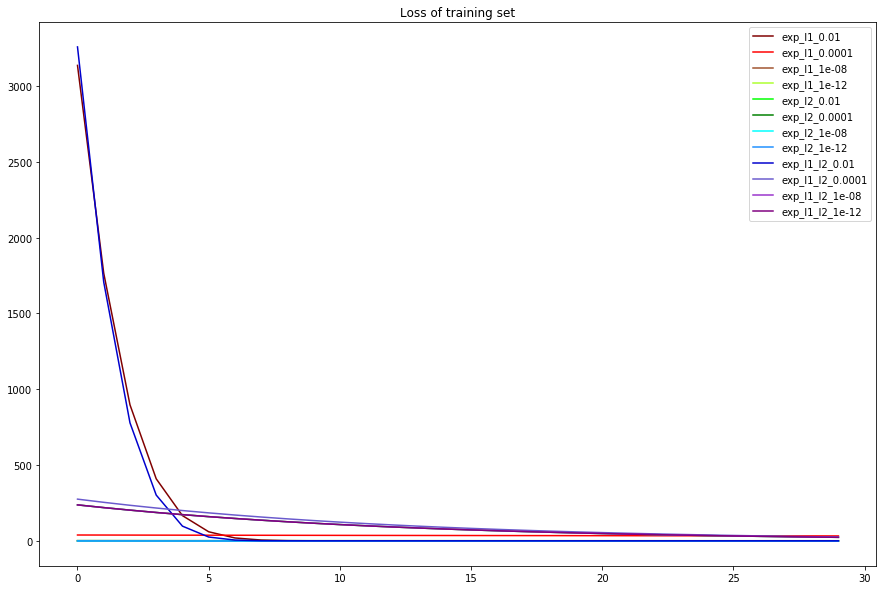

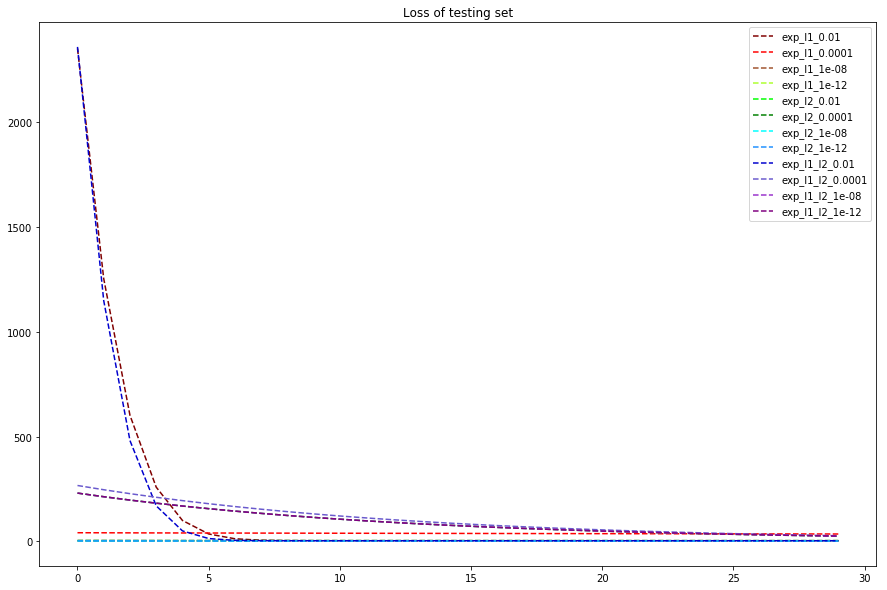

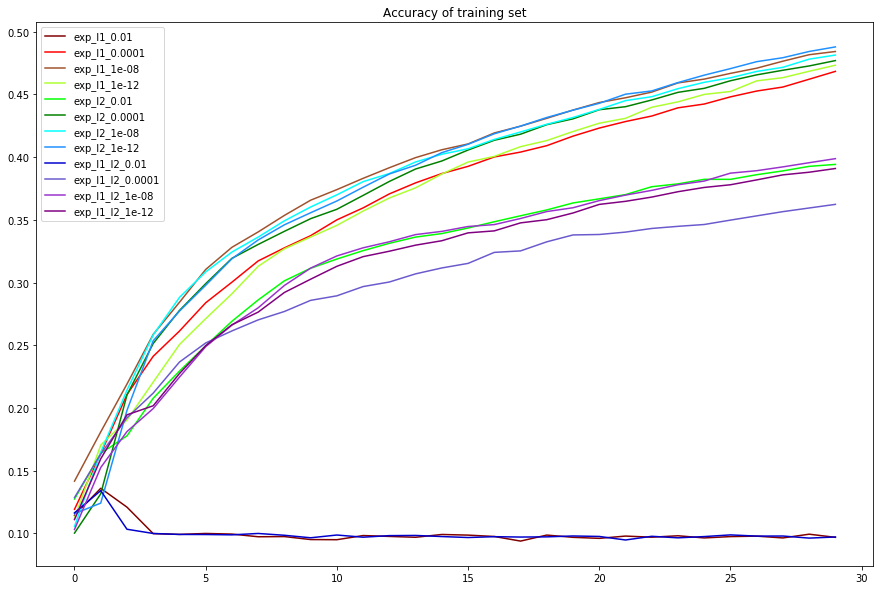

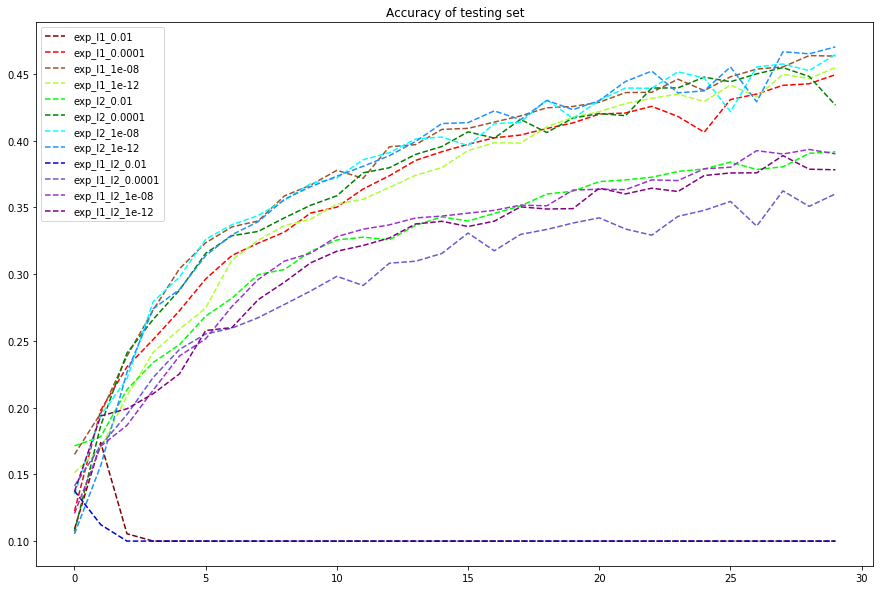

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar=['maroon','red','sienna','greenyellow','lime','green','aqua','dodgerblue','mediumblue','slateblue','darkorchid','purple']
"""
plot the results
"""
plt.figure(figsize=(15,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',label=cond,color=color_bar[i])
plt.title('Loss of training set')
plt.legend()

plt.figure(figsize=(15,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'],'--',label=cond,color=color_bar[i])
plt.title('Loss of testing set')
plt.legend()

plt.figure(figsize=(15,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',label=cond,color=color_bar[i])
plt.title('Accuracy of training set')
plt.legend()

plt.figure(figsize=(15,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'],'--',label=cond,color=color_bar[i])
plt.title('Accuracy of testing set')
plt.legend()
